# <center>Consolidação dos seus investimentos em Python<center>
<img src="figuras/giphy.gif" width="500" height="250">

# Bibliotecas utilizadas

In [1]:
import pyfolio as pf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

C:\Users\maisa\Anaconda3\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


# Faz leitura do arquivo com os investimentos

In [2]:
df_investimento = pd.read_excel("ativos_ok.xlsx", sheet_name=['RendaVariavelAjustado'], index_col = 0)
df_investimento = df_investimento['RendaVariavelAjustado']

In [3]:
df_investimento.head()

data nome investimento  quantidade original  valor original  aporte  \
0 2019-01-22             ITSA4                  100           12.72  1272.0   
1 2019-05-13             ABEV3                   55           17.00   935.0   
2 2019-05-13             WEGE3                   50           18.10   905.0   
3 2019-05-13             EGIE3                   20           42.43   848.6   
4 2019-12-19             ABEV3                  -55           19.06 -1048.3   

   quantidade  valor  
0         100  12.72  
1          55  17.00  
2         100   9.05  
3          20  42.43  
4         -55  19.06

Importa o arquivo funcoes_auxiliares.py que contém as funções auxiliares utilizadas

In [4]:
import funcoes_auxiliares as fa

# Faz a consolidação dos seus investimentos

In [5]:
portfolio = fa.consolida_portfolio(df_investimento)

[*********************100%***********************]  12 of 12 completed


In [6]:
portfolio.tail()

nome investimento  ABEV3   CMIN3  EGIE3    GGBR3   ITSA4  MGLU3  OIBR3  \
Date                                                                     
2021-10-08           0.0  1246.0    0.0  1655.25  1132.0  748.5  186.0   
2021-10-11           0.0  1286.0    0.0  1660.50  1115.0  719.0  188.0   
2021-10-13           0.0  1240.0    0.0  1678.50  1117.0  725.0  194.0   
2021-10-14           0.0  1222.0    0.0  1713.75  1104.0  708.5  194.0   
2021-10-15           0.0  1330.0    0.0  1724.25  1125.0  728.0  200.0   

nome investimento   PETR4    VIIA3   VILG11  VIVT3   WEGE3     saldo  \
Date                                                                   
2021-10-08         1747.2  2023.06  1879.56  900.0  2319.0  13836.57   
2021-10-11         1759.2  1985.41  1897.20  905.8  2317.2  13833.31   
2021-10-13         1777.8  2060.71  1862.82  920.0  2434.8  14010.63   
2021-10-14         1780.8  2008.00  1863.00  916.0  2436.0  13946.05   
2021-10-15         1776.0  2043.14  1860.84  923.4  2407.2  14117.83   

nome investimento   vl_cota    qtd_cotas   retorno  
Date                                                
2021-10-08         1.455097  9509.033794  0.023446  
2021-10-11         1.454755  9509.033794 -0.000236  
2021-10-13         1.473402  9509.033794  0.012818  
2021-10-14         1.466611  9509.033794 -0.004609  
2021-10-15         1.484676  9509.033794  0.012317

# Obtém o retorno acumulado do portfólio

In [8]:
retorno_acumulado_portfolio = (1+portfolio['retorno']).cumprod()-1

# Obtém o retorno e o retorno acumulado do Ibovespa

In [9]:
retorno_ibovespa, retorno_acumulado_ibovespa = fa.ibovespa(df_investimento)

[*********************100%***********************]  1 of 1 completed


# Obtém o retorno e o retorno acumulado do CDI

In [10]:
retorno_cdi, retorno_acumulado_cdi = fa.cdi(portfolio)

# <center>Relatório gráfico dos investimentos<center>

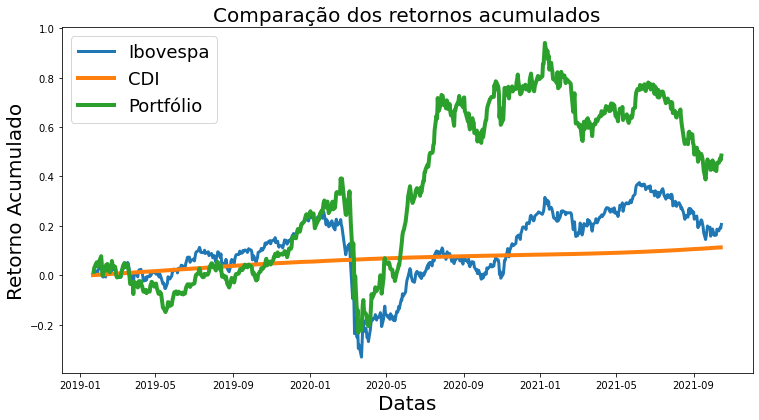

In [11]:
fa.grafico_rentabilidade_acumulada(retorno_acumulado_ibovespa, retorno_acumulado_cdi,retorno_acumulado_portfolio)

In [12]:
fa.get_grafico_composicao(portfolio)

# Gráfico com destaque para duração dos cinco maiores Drawdowns

<AxesSubplot:title={'center':'Top 2 drawdown periods'}, ylabel='Cumulative returns'>

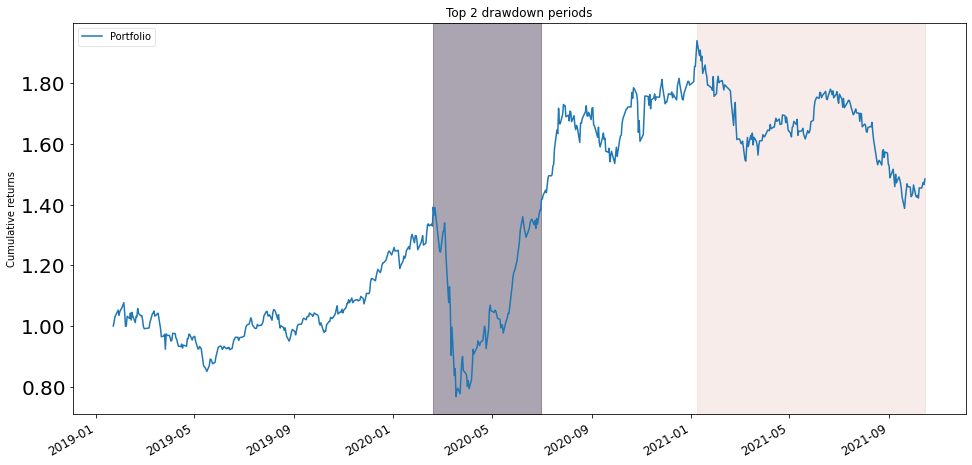

In [14]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_drawdown_periods(returns=portfolio['retorno'], top = 2, ax=ax1)

# Histograma com os retornos mensais

<AxesSubplot:title={'center':'Distribution of monthly returns'}, xlabel='Returns', ylabel='Number of months'>

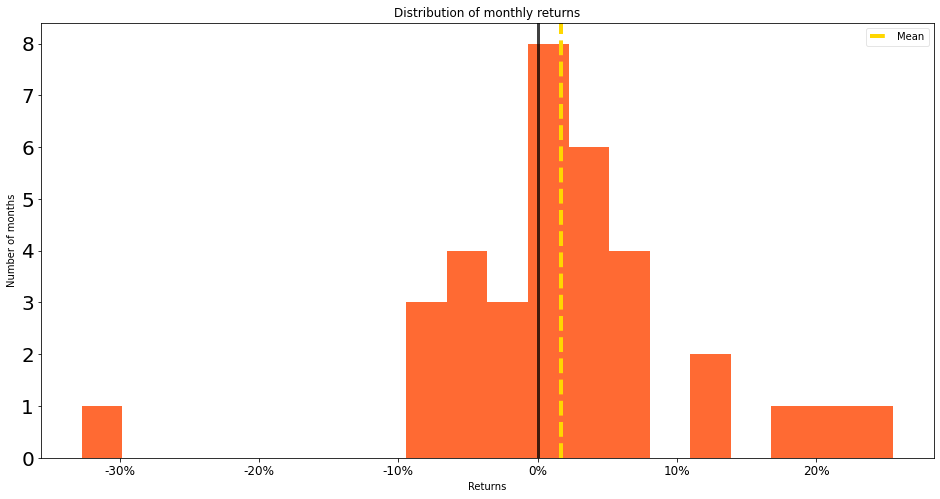

In [15]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_monthly_returns_dist(portfolio["retorno"], ax=ax1)

# Mapa de calor com os retornos mensais

<AxesSubplot:title={'center':'Monthly returns (%)'}, xlabel='Month', ylabel='Year'>

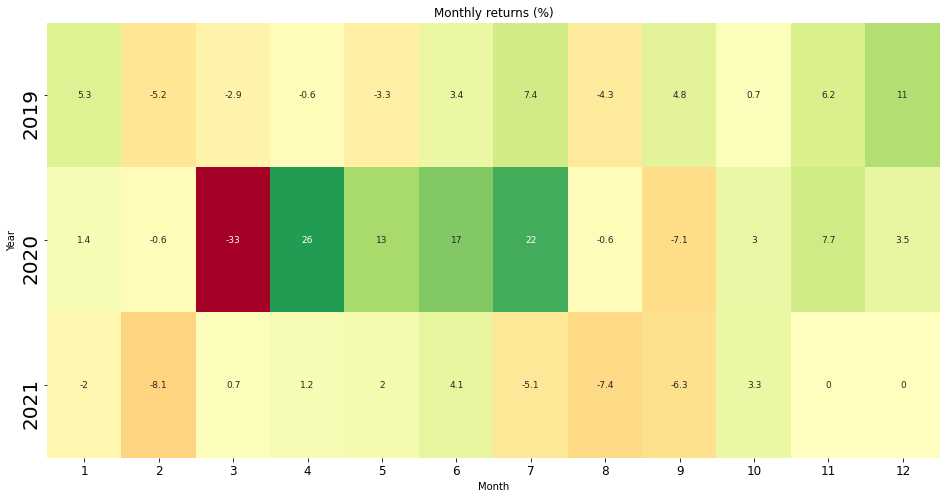

In [16]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_monthly_returns_heatmap(portfolio["retorno"], ax=ax1)

# Gráfico comparando o Índice de Sharpe do Portfólio e do Ibovespa

<AxesSubplot:title={'center':'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

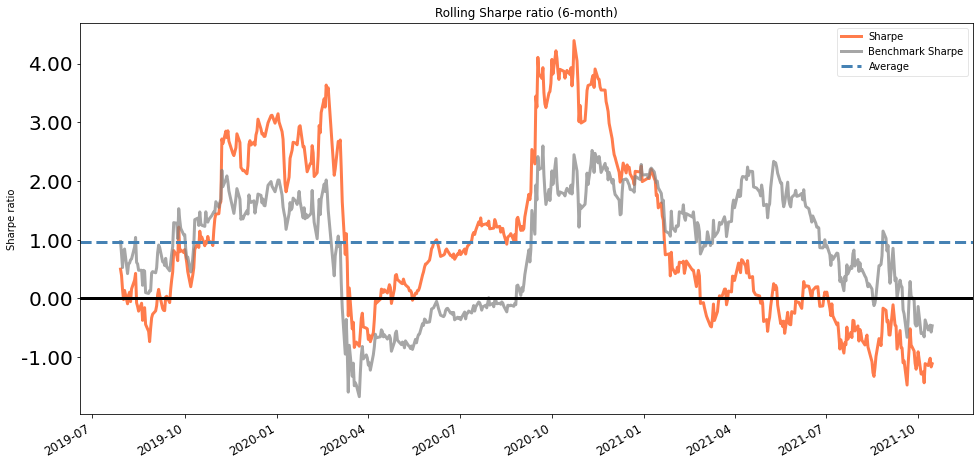

In [17]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_sharpe(portfolio["retorno"], ax=ax1, factor_returns=retorno_ibovespa)

# Boxplot com vários indicadores

<AxesSubplot:>

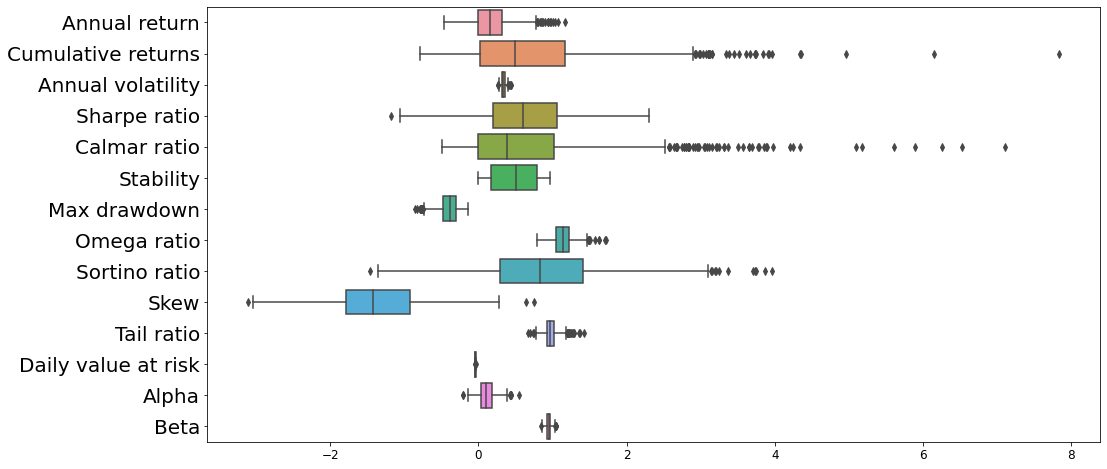

In [18]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_perf_stats(portfolio["retorno"], ax=ax1, factor_returns=retorno_ibovespa)

# Gráfico de barras com retornos anuais

<AxesSubplot:title={'center':'Annual returns'}, xlabel='Returns', ylabel='Year'>

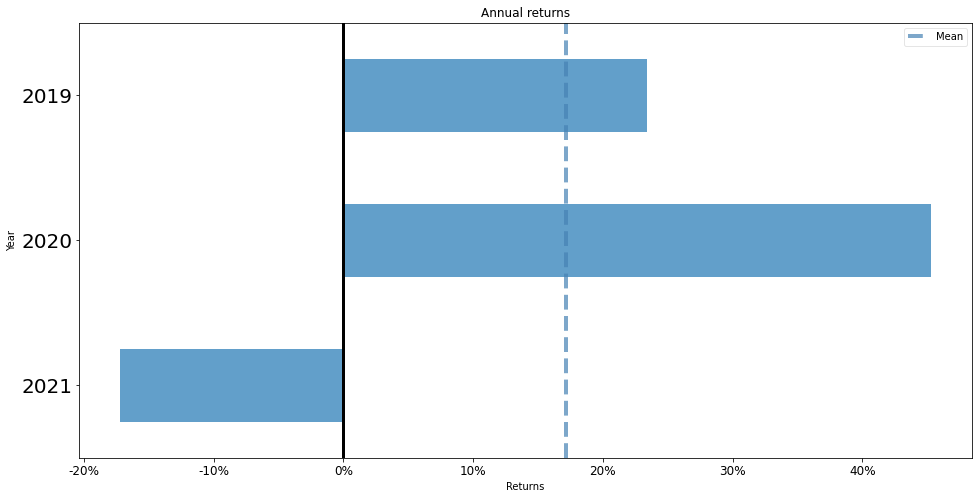

In [19]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_annual_returns(portfolio["retorno"], ax=ax1)

# Relatório completo das principais informações do Portfólio

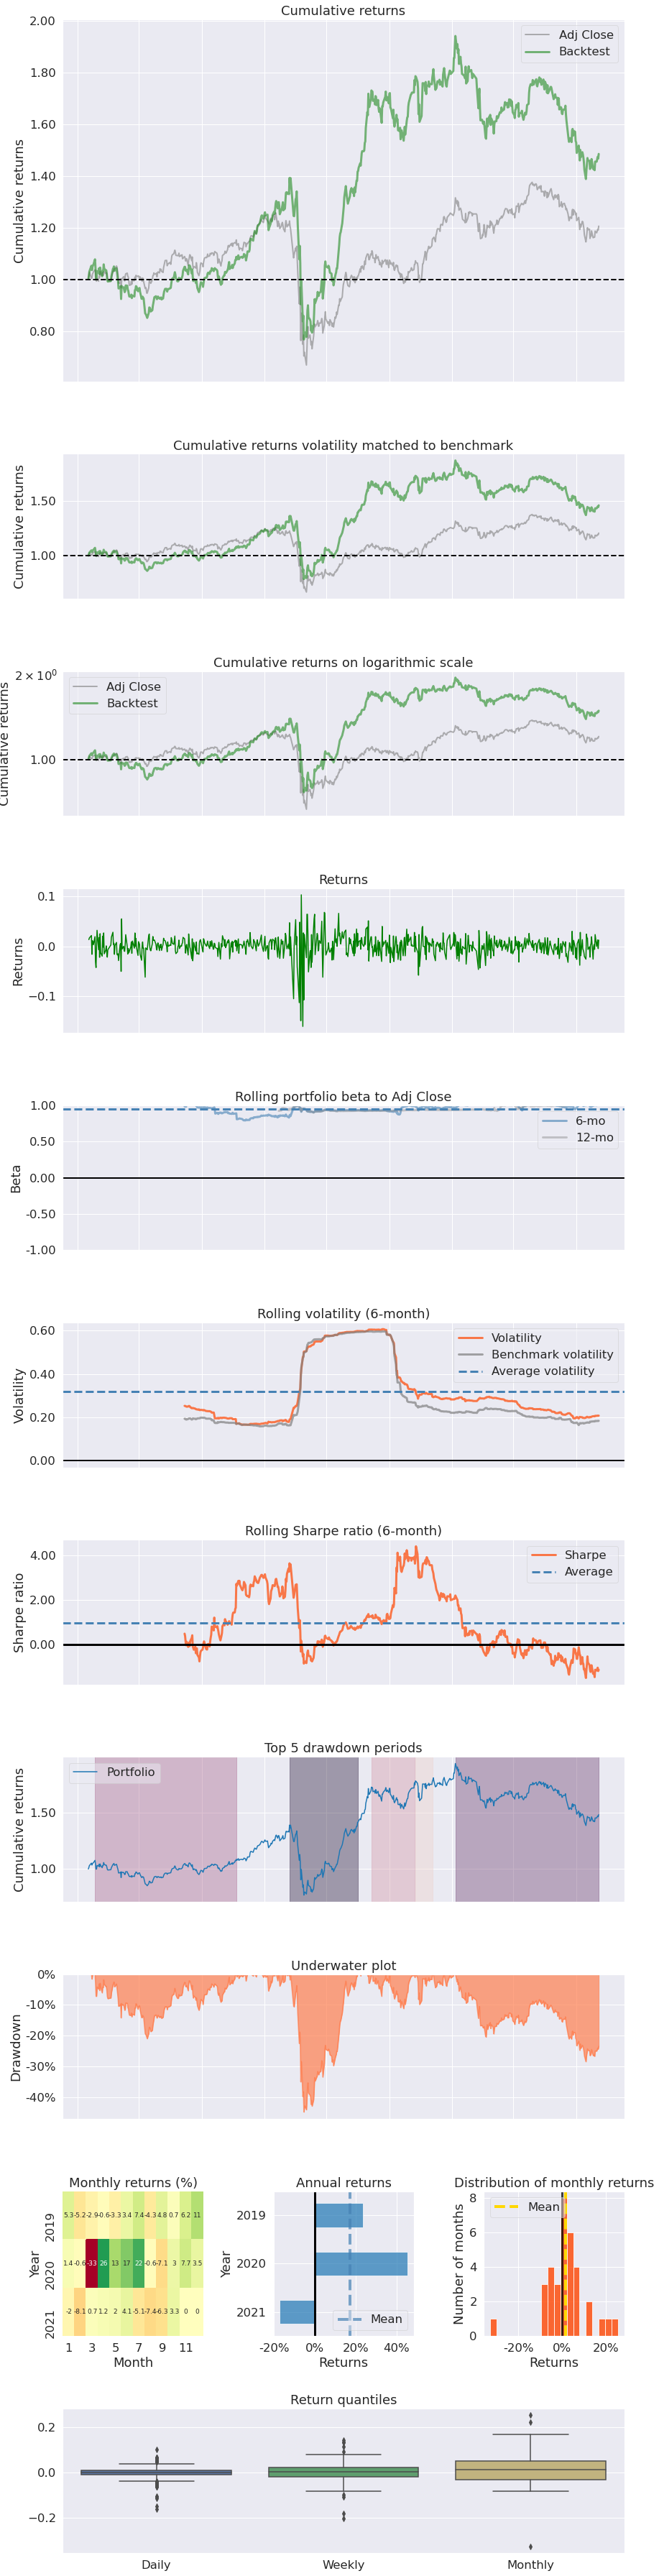

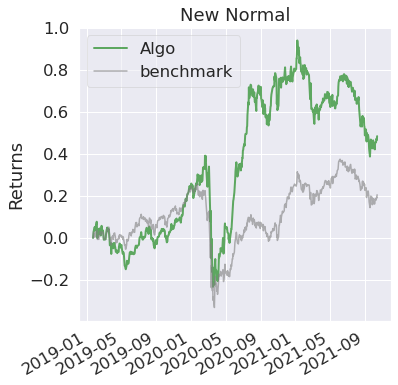

In [20]:
pf.create_full_tear_sheet(portfolio["retorno"], benchmark_rets=retorno_ibovespa)

# Obtém a série histórica dos preços de fechamento ajustados dos ativos negociados

In [21]:
prices = fa.get_prices(df_investimento)
prices.fillna(method = 'backfill', inplace = True)

[*********************100%***********************]  12 of 12 completed


# Obtém relatório que compara o preço médio e o preço atual dos ativos

In [23]:
relatorio_portfolio = fa.get_preco_medio(prices, df_investimento)

In [24]:
relatorio_portfolio

Quantidade  Preço médio  Preço atual  Posição atual
ITSA4          100        12.72        11.25        1125.00
ABEV3            0        17.00        15.53           0.00
WEGE3           60         9.05        40.12        2407.20
EGIE3            0        42.43        38.55           0.00
VIIA3          251         9.33         8.14        2043.14
OIBR3          200         0.89         1.00         200.00
PETR4           60        24.06        29.60        1776.00
GGBR3           75        13.79        22.99        1724.25
VILG11          18       121.81       103.38        1860.84
CMIN3          200         9.19         6.65        1330.00
MGLU3           50        20.80        14.56         728.00
VIVT3           20        45.33        46.17         923.40

# Matriz de covariância

In [25]:
matriz_cov = prices.cov().round(2)
matriz_cov

ABEV3  CMIN3  EGIE3  GGBR3  ITSA4  MGLU3  OIBR3  PETR4  VIIA3  VILG11  \
ABEV3    4.57  -0.03   1.24   2.39   2.37  -4.73   0.06   6.21  -3.44    1.41   
CMIN3   -0.03   0.39   0.07  -0.77  -0.05  -0.26   0.06  -0.57   0.35    2.00   
EGIE3    1.24   0.07   6.99   3.34   1.33   5.27   0.14   3.69   6.35   17.02   
GGBR3    2.39  -0.77   3.34  31.44   0.41  27.00   1.01   8.32  12.80    4.58   
ITSA4    2.37  -0.05   1.33   0.41   1.63  -3.00  -0.02   3.94  -1.63    2.70   
MGLU3   -4.73  -0.26   5.27  27.00  -3.00  47.44   1.47  -0.95  28.93   22.11   
OIBR3    0.06   0.06   0.14   1.01  -0.02   1.47   0.20   0.32   0.82    0.73   
PETR4    6.21  -0.57   3.69   8.32   3.94  -0.95   0.32  13.52  -1.15    5.38   
VIIA3   -3.44   0.35   6.35  12.80  -1.63  28.93   0.82  -1.15  23.34   25.46   
VILG11   1.41   2.00  17.02   4.58   2.70  22.11   0.73   5.38  25.46   84.91   
VIVT3   -3.08  -0.23   5.03   8.28  -1.39  16.46  -0.10  -2.02  12.51   10.20   
WEGE3   -7.18  -2.14   7.45  52.43  -4.76  77.00   2.39   1.81  43.00   17.84   

        VIVT3   WEGE3  
ABEV3   -3.08   -7.18  
CMIN3   -0.23   -2.14  
EGIE3    5.03    7.45  
GGBR3    8.28   52.43  
ITSA4   -1.39   -4.76  
MGLU3   16.46   77.00  
OIBR3   -0.10    2.39  
PETR4   -2.02    1.81  
VIIA3   12.51   43.00  
VILG11  10.20   17.84  
VIVT3   13.32   27.49  
WEGE3   27.49  140.90

# Matriz de correlação

In [26]:
matriz_corr = prices.corr().round(2)
matriz_corr

ABEV3  CMIN3  EGIE3  GGBR3  ITSA4  MGLU3  OIBR3  PETR4  VIIA3  VILG11  \
ABEV3    1.00  -0.02   0.22   0.20   0.87  -0.32   0.06   0.79  -0.33    0.07   
CMIN3   -0.02   1.00   0.04  -0.22  -0.06  -0.06   0.20  -0.25   0.12    0.34   
EGIE3    0.22   0.04   1.00   0.22   0.39   0.29   0.12   0.38   0.50    0.70   
GGBR3    0.20  -0.22   0.22   1.00   0.06   0.70   0.40   0.40   0.47    0.09   
ITSA4    0.87  -0.06   0.39   0.06   1.00  -0.34  -0.04   0.84  -0.26    0.23   
MGLU3   -0.32  -0.06   0.29   0.70  -0.34   1.00   0.47  -0.04   0.87    0.35   
OIBR3    0.06   0.20   0.12   0.40  -0.04   0.47   1.00   0.19   0.38    0.17   
PETR4    0.79  -0.25   0.38   0.40   0.84  -0.04   0.19   1.00  -0.06    0.16   
VIIA3   -0.33   0.12   0.50   0.47  -0.26   0.87   0.38  -0.06   1.00    0.57   
VILG11   0.07   0.34   0.70   0.09   0.23   0.35   0.17   0.16   0.57    1.00   
VIVT3   -0.39  -0.10   0.52   0.40  -0.30   0.65  -0.06  -0.15   0.71    0.30   
WEGE3   -0.28  -0.29   0.24   0.79  -0.31   0.94   0.44   0.04   0.75    0.16   

        VIVT3  WEGE3  
ABEV3   -0.39  -0.28  
CMIN3   -0.10  -0.29  
EGIE3    0.52   0.24  
GGBR3    0.40   0.79  
ITSA4   -0.30  -0.31  
MGLU3    0.65   0.94  
OIBR3   -0.06   0.44  
PETR4   -0.15   0.04  
VIIA3    0.71   0.75  
VILG11   0.30   0.16  
VIVT3    1.00   0.63  
WEGE3    0.63   1.00

<AxesSubplot:>

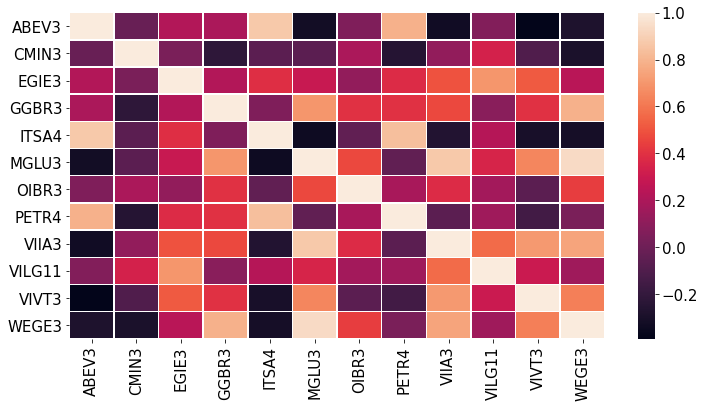

In [38]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(matriz_corr.T, linewidths=.5)

# Obtendo retornos diários

In [27]:
retornos_diarios =prices.pct_change()
retornos_diarios = retornos_diarios[1:]

# Obtendo retornos diários acumulados

In [30]:
retornos_diarios_acumulados = (1+retornos_diarios).cumprod()-1

In [31]:
retornos_diarios_acumulados.tail()

ABEV3     CMIN3     EGIE3     GGBR3     ITSA4     MGLU3  \
Date                                                                     
2021-10-08 -0.073024 -0.300786  0.143292  0.963523  0.003546  2.042683   
2021-10-11 -0.080266 -0.278339  0.155461  0.969751 -0.011525  1.922764   
2021-10-13 -0.063971 -0.304153  0.171889  0.991103 -0.009752  1.947154   
2021-10-14 -0.065178 -0.314254  0.171585  1.032918 -0.021277  1.880081   
2021-10-15 -0.062764 -0.253648  0.172802  1.045374 -0.002660  1.959350   

               OIBR3     PETR4     VIIA3    VILG11     VIVT3     WEGE3  
Date                                                                    
2021-10-08 -0.284615  0.311121  0.634888 -0.059279  0.397082  3.308807  
2021-10-11 -0.276923  0.320126  0.604462 -0.050450  0.406085  3.305463  
2021-10-13 -0.253846  0.334084  0.665314 -0.067658  0.428128  3.523969  
2021-10-14 -0.253846  0.336335  0.622718 -0.067568  0.421919  3.526198  
2021-10-15 -0.230769  0.332733  0.651116 -0.068649  0.433406  3.472687

# Compara rentabilidade acumulada dos ativos que tiveram retorno acumulado positivo e dos ativos que tiveram retorno acumulado negativo

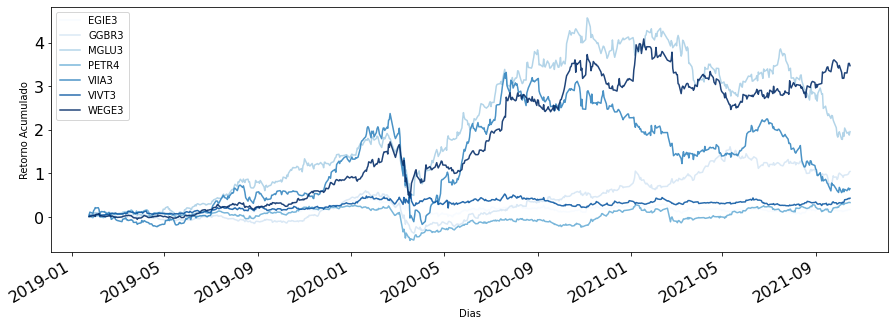

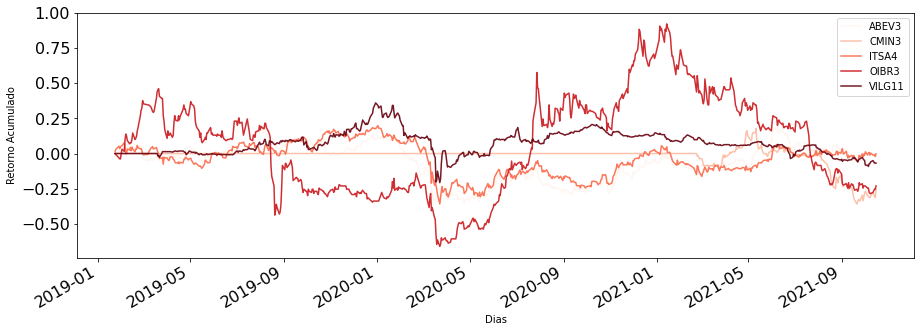

In [32]:
fa.grafico_rentabilidade_acumulada_acoes(retornos_diarios_acumulados)

# <center>Obrigada pela presença. Espero que este minicurso tenha contribuído de alguma maneira para seu conhecimento.<center> 

<img src="figuras/obrigada_gif.gif" width="400" height="200">